In [1]:
# Imort main libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for photing and viewing data
import matplotlib.pyplot as plt# plotting library

In [2]:
import os
for dirname, _, filenames in os.walk("Amazon"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv('Amazon')

In [4]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/31/1997,5.041667,4.843750,4.875000,5.020833,4446000,5.020833
1,1/2/1998,5.000000,4.796875,5.000000,4.958333,1660800,4.958333
2,1/5/1998,4.937500,4.708333,4.885417,4.750000,3590400,4.750000
3,1/6/1998,4.875000,4.666667,4.697917,4.838542,4174800,4.838542
4,1/7/1998,4.833333,4.692708,4.833333,4.781250,2725200,4.781250


In [5]:
df.set_index('Date',inplace = True)# Set the date to be the index

In [6]:
# resorting the data
df.index =  pd.to_datetime(df.index,)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000,5.020833
1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800,4.958333
1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400,4.750000
1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800,4.838542
1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200,4.781250


Text(0.5, 1.0, 'Anazon Stock at all time')

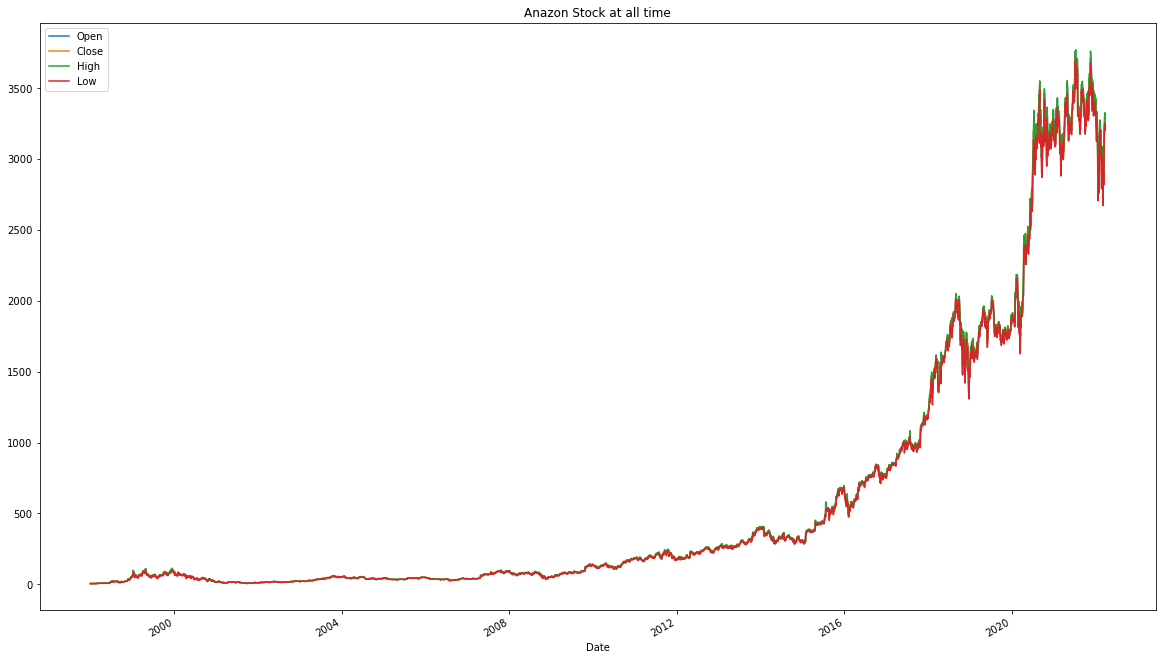

In [8]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Anazon Stock at all time')

Text(0, 0.5, 'Stock action')

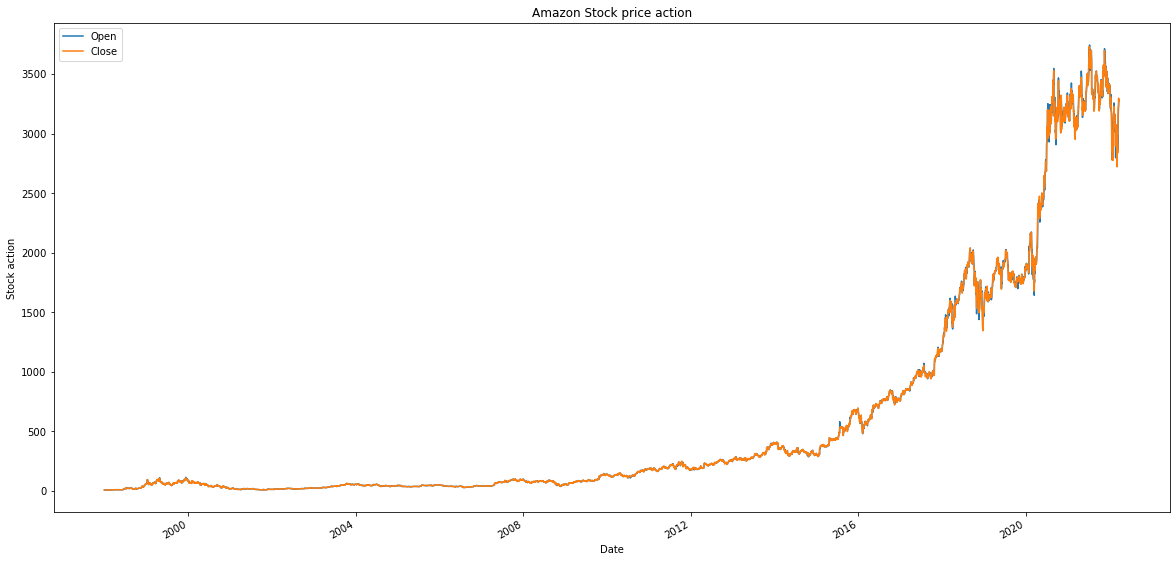

In [9]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

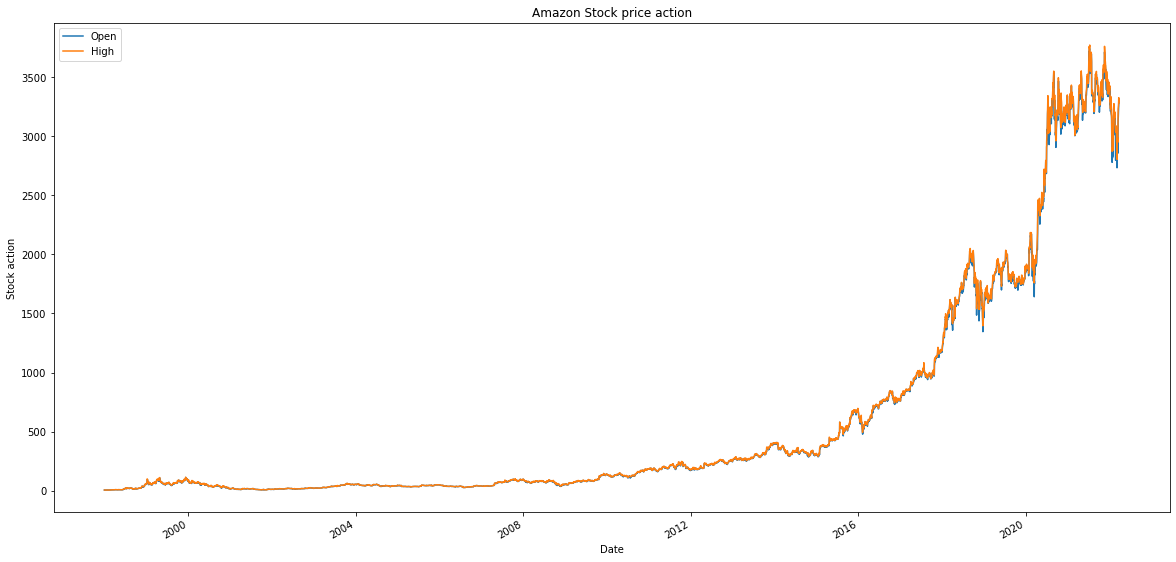

In [10]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

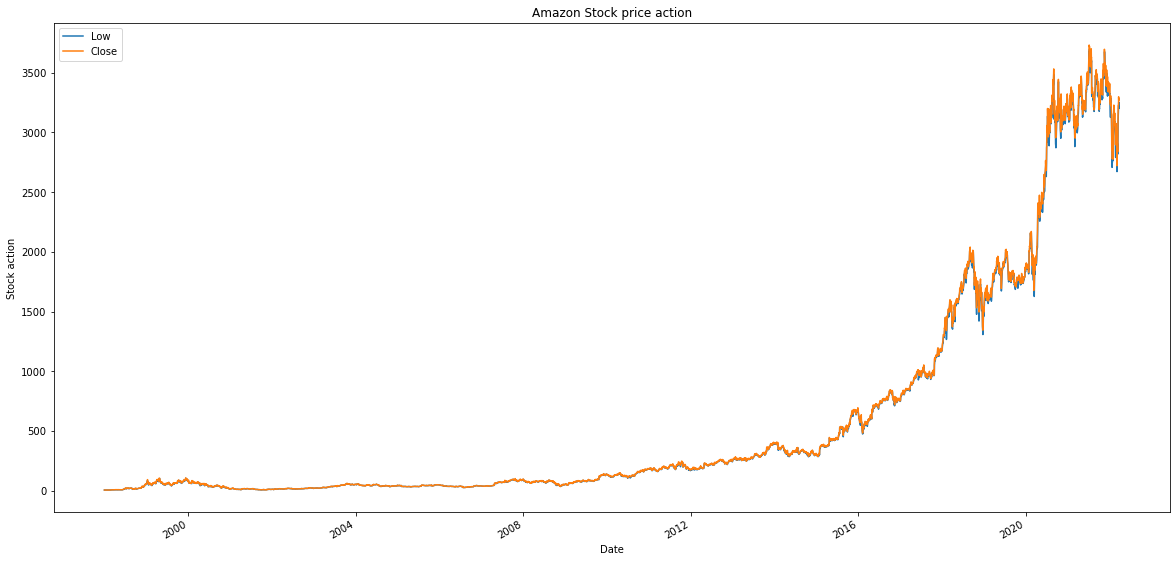

In [11]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

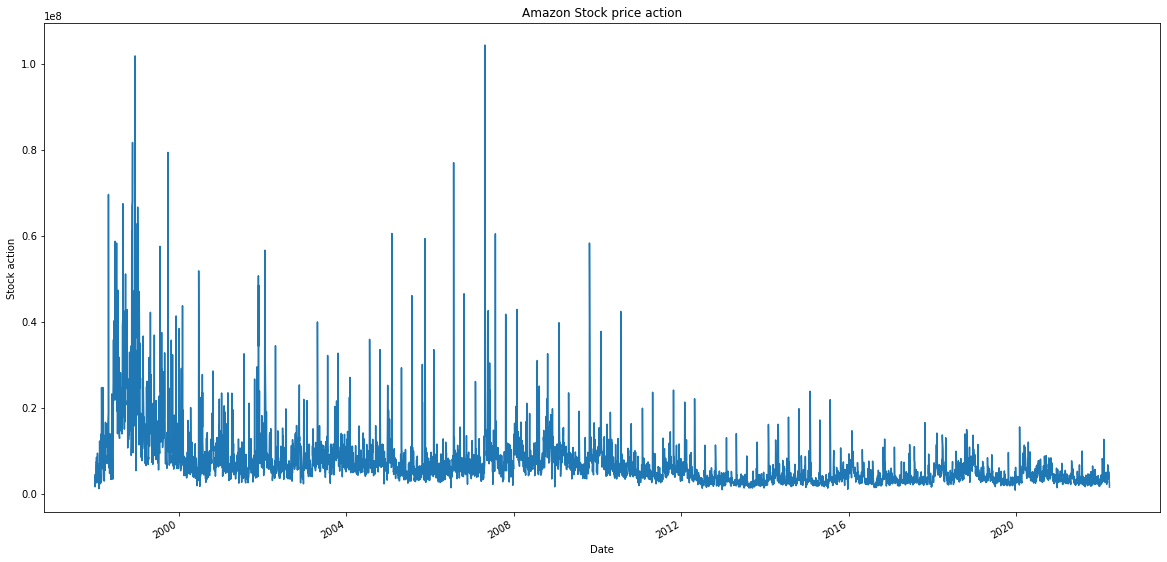

In [12]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

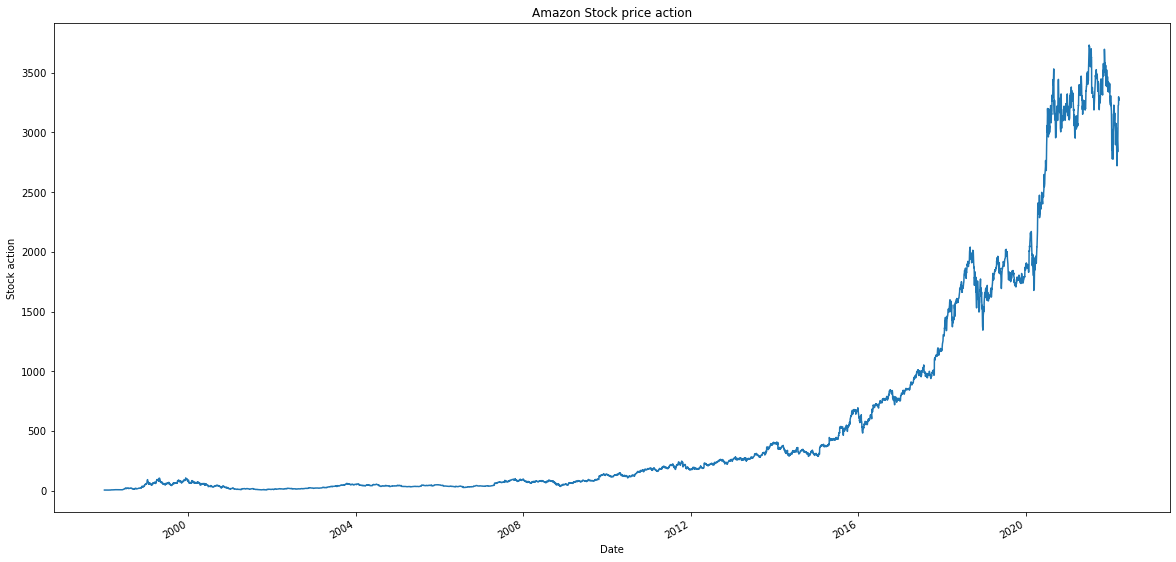

In [13]:
df['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2021')

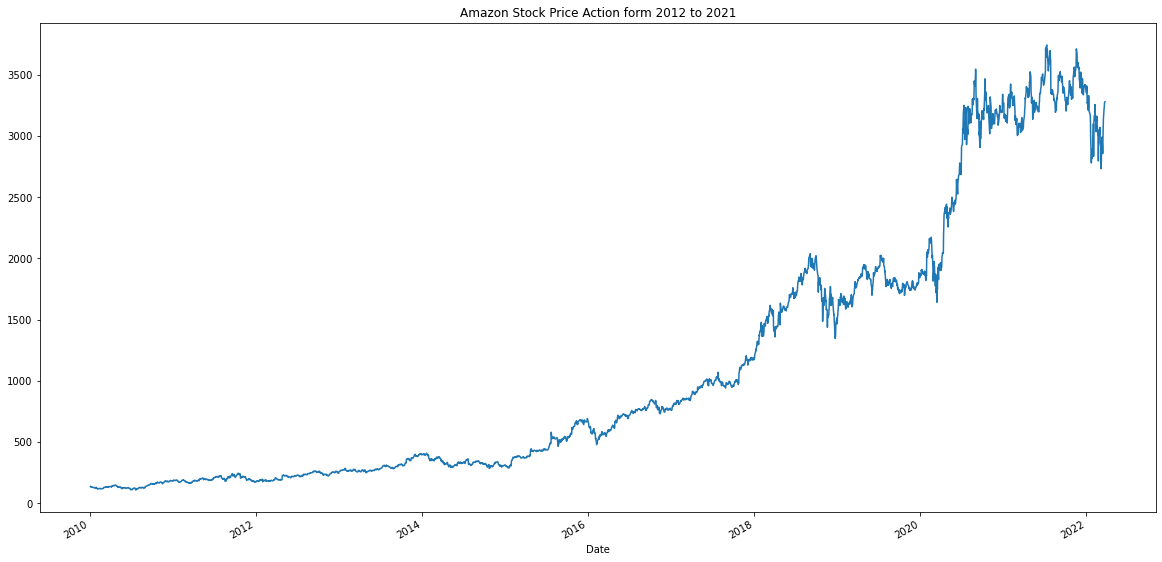

In [14]:
Ama = df['2010':'2022']

Ama['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2021')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2021')

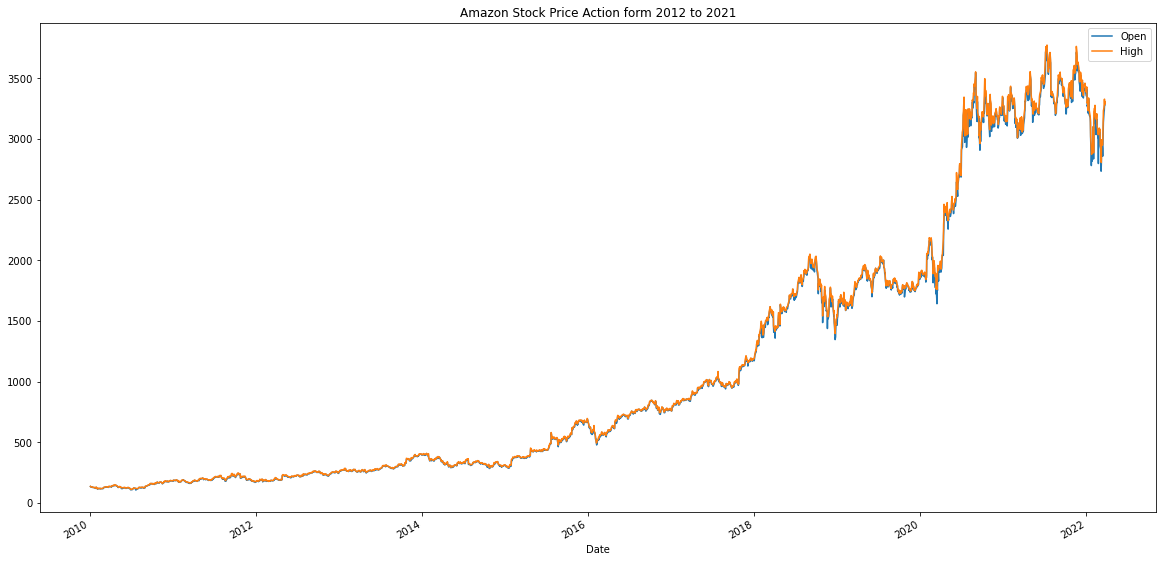

In [15]:
Ama[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2021')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

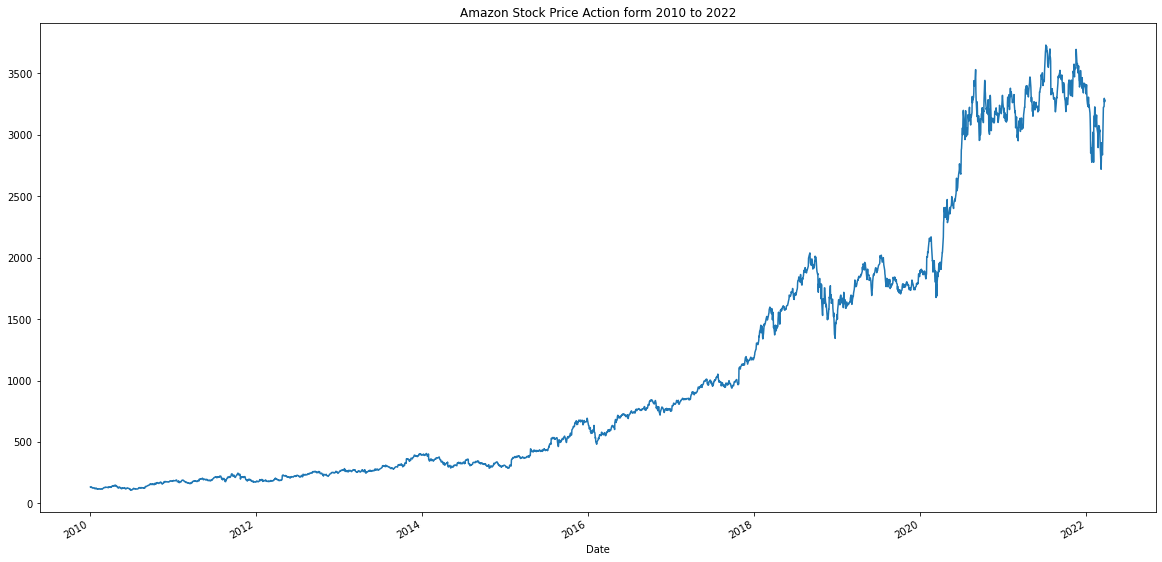

In [16]:
Ama['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

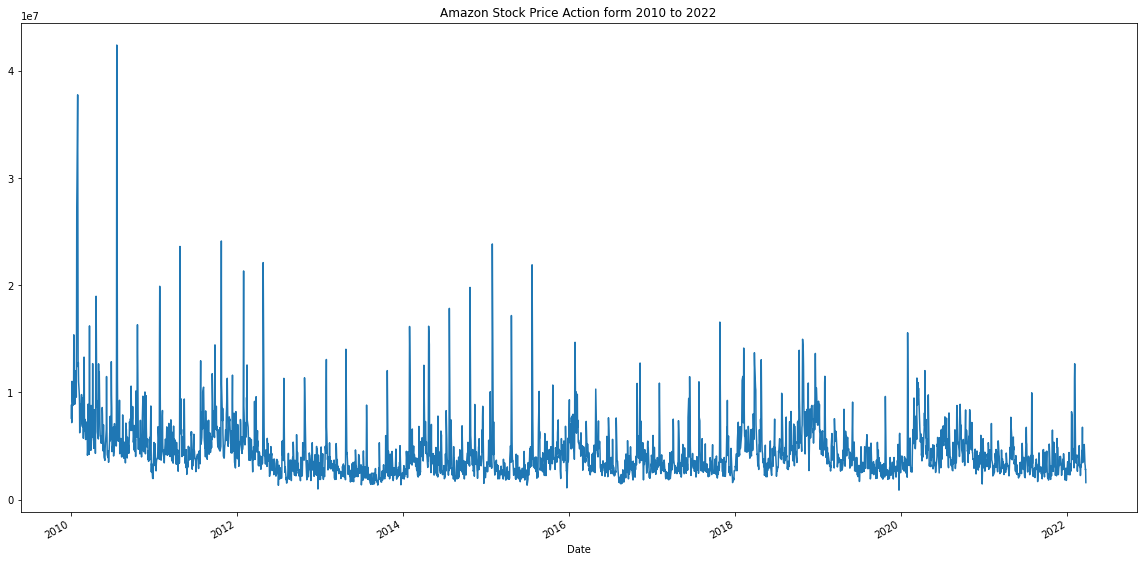

In [17]:
Ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

In [18]:
Ama.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3079.000000,3079.000000,3079.000000,3079.000000,3.079000e+03,3079.000000
mean,1116.621395,1091.651838,1104.820826,1104.411010,4.457763e+06,1104.411010
std,1080.535486,1055.277226,1068.628180,1067.761552,2.700779e+06,1067.761552
min,111.290001,105.800003,105.930000,108.610001,8.813000e+05,108.610001
25%,261.914993,256.779999,259.095001,259.145004,2.814300e+06,259.145004
50%,628.630005,616.250000,624.469971,625.900024,3.760800e+06,625.900024
75%,1792.779968,1757.025024,1775.599976,1776.475036,5.250400e+06,1776.475036
max,3773.080078,3696.790039,3744.000000,3731.409912,4.242110e+07,3731.409912


In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [20]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                    2.248104
p-value                           0.998920
#Lags Used                       31.000000
Number of Observations Used    6067.000000
Critical Value (1%)              -3.431428
Critical Value (5%)              -2.862017
Critical Value (10%)             -2.567024
dtype: float64
None


In [21]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                   1.558802
p-value                          0.997729
#Lags Used                      16.000000
Number of Observations Used    275.000000
Critical Value (1%)             -3.454355
Critical Value (5%)             -2.872108
Critical Value (10%)            -2.572401
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -5.390742
p-value                          0.000004
#Lags Used                       3.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64
None


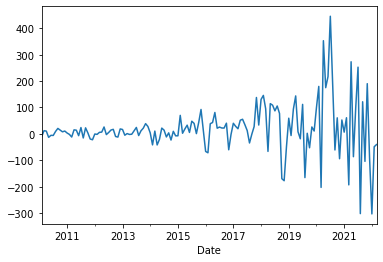

In [22]:
Ama_diff = Ama['Open'].resample('MS').mean() - Ama['Open'].resample('MS').mean().shift(1)
Ama_open_diff = Ama_diff.dropna()
Ama_open_diff.plot()


print(adf_test(Ama_open_diff))

In [23]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [24]:
kpss_test(Ama['High'])

Results of KPSS Test:
Test Statistic            8.038127
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_18928/3429100400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ama["High_diff"] = Ama["High"] - Ama["High"].shift(1)


<AxesSubplot:xlabel='Date'>

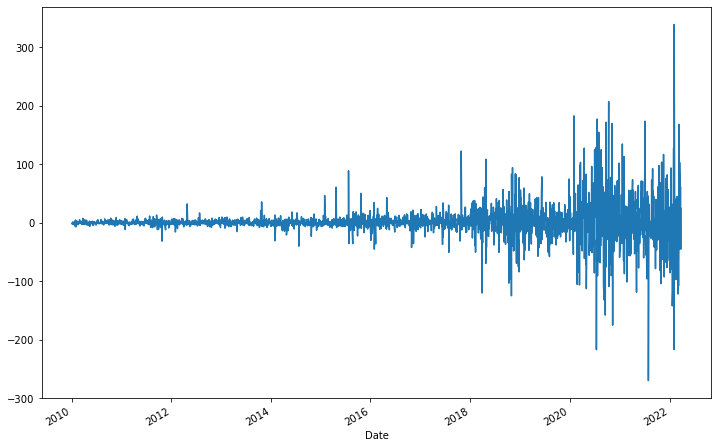

In [25]:
Ama["High_diff"] = Ama["High"] - Ama["High"].shift(1)
Ama["High_diff"].dropna().plot(figsize=(12, 8))

In [26]:
kpss_test(Ama['High_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.25626
p-value                  0.10000
Lags Used                0.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [27]:
kpss_test(Ama['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.285843
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [28]:
kpss_test(Ama['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           1.391378
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [29]:
adf_test(Ama['High_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.264224e+01
p-value                        1.426592e-23
#Lags Used                     2.600000e+01
Number of Observations Used    3.051000e+03
Critical Value (1%)           -3.432495e+00
Critical Value (5%)           -2.862488e+00
Critical Value (10%)          -2.567275e+00
dtype: float64
